# Pandas Missing Data

In [1]:
import pandas as pd
import numpy as np

## Example Data

In [2]:
data = {'A':[10,20,np.nan,12,24],
       'B':[40,50,46,13,26],
       'C':[11,np.nan,np.nan,np.nan,np.nan],
       'D':[np.nan,np.nan,np.nan,np.nan,np.nan]}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,A,B,C,D
0,10.0,40,11.0,NaN
1,20.0,50,NaN,NaN
2,NaN,46,NaN,NaN
3,12.0,13,NaN,NaN
4,24.0,26,NaN,NaN


## pd.isnull

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [5]:
df.isnull()

,A,B,C,D
0,False,False,False,True
1,False,False,True,True
2,True,False,True,True
3,False,False,True,True
4,False,False,True,True


https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python

In [6]:
df.isnull().any(axis=1)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [7]:
df[df.isnull().any(axis=1)]

,A,B,C,D
0,10.0,40,11.0,NaN
1,20.0,50,NaN,NaN
2,NaN,46,NaN,NaN
3,12.0,13,NaN,NaN
4,24.0,26,NaN,NaN


## pd.isna

### Which rows have NaN?

https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

In [8]:
df.isna()

,A,B,C,D
0,False,False,False,True
1,False,False,True,True
2,True,False,True,True
3,False,False,True,True
4,False,False,True,True


In [9]:
df.isna().any(axis=1)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [10]:
df[df.isnull().any(axis=1)]

,A,B,C,D
0,10.0,40,11.0,NaN
1,20.0,50,NaN,NaN
2,NaN,46,NaN,NaN
3,12.0,13,NaN,NaN
4,24.0,26,NaN,NaN


### Which columns have NaNs?

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

In [11]:
df

,A,B,C,D
0,10.0,40,11.0,NaN
1,20.0,50,NaN,NaN
2,NaN,46,NaN,NaN
3,12.0,13,NaN,NaN
4,24.0,26,NaN,NaN


In [12]:
list(df.columns[df.isna().any(axis=0)])

['A', 'C', 'D']

### Which columns don't have NaNs?

In [13]:
list(df.columns[df.isna().any(axis=0)==False])

['B']

In [14]:
set(df.columns[df.isna().any(axis=0)==False])

{'B'}

### How many NaNs are there?

In [15]:
df

,A,B,C,D
0,10.0,40,11.0,NaN
1,20.0,50,NaN,NaN
2,NaN,46,NaN,NaN
3,12.0,13,NaN,NaN
4,24.0,26,NaN,NaN


In [16]:
df.isna().sum()

A    1
B    0
C    4
D    5
dtype: int64

In [17]:
df.isna().sum().sum()

10

### Which column has the most missing values?

In [18]:
df.isna().sum()

A    1
B    0
C    4
D    5
dtype: int64

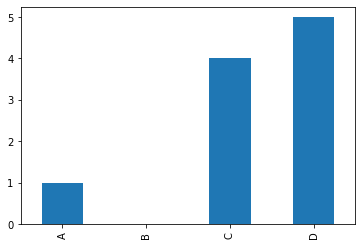

In [28]:
df.isna().sum().plot(kind="bar");

In [20]:
max(df.isna().sum())

5

In [21]:
set(df.columns[df.isna().sum()==max(df.isna().sum())])

{'D'}

### Which columns have more than 75% of their values missing?

In [22]:
df.isna().sum()

A    1
B    0
C    4
D    5
dtype: int64

In [23]:
df.shape[0]

5

In [24]:
(df.isna().sum() / df.shape[0])*100

A     20.0
B      0.0
C     80.0
D    100.0
dtype: float64

In [25]:
((df.isna().sum() / df.shape[0])*100)>75

A    False
B    False
C     True
D     True
dtype: bool

In [26]:
set(df.columns[((df.isna().sum() / df.shape[0])*100)>75])

{'C', 'D'}